In [128]:
# Import the appropriate libraries with aliases
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Create two new dataframes
north = pd.read_csv("NorthCallCenter.csv")
south = pd.read_csv("SouthCallCenter.csv")

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. In the code blocks below enter the code used to solve the question.  At the end of the section record your answers by double clicking where asked.

#### EDA Question 1A:  How many reps are in the North branch? 

In [129]:
#Code Used:
north_reps = north["Rep ID"].value_counts().count()
north_reps

9

#### EDA Question 1B:  How many reps are in the South branch? 

In [130]:
#Code Used:
south_reps = south["Rep ID"].value_counts().count()
south_reps

11

#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [131]:
north[["Busy Minutes", "Not Ready Minutes", "Incoming Wait Time", "During Call Wait Time"]].mean()

Busy Minutes             9.987755
Not Ready Minutes        1.914286
Incoming Wait Time       3.048780
During Call Wait Time    2.967347
dtype: float64

#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [132]:
south[["Busy Minutes", "Not Ready Minutes", "Incoming Wait Time", "During Call Wait Time"]].mean()

Busy Minutes             10.054140
Not Ready Minutes         1.910828
Incoming Wait Time        3.000000
During Call Wait Time     3.076433
dtype: float64

#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [133]:
# Code Used:
north_time_block_calls = north["Time Block"].value_counts()
north_time_block_calls
south_time_block_calls = south["Time Block"].value_counts()
south_time_block_calls
total_time_block_calls = south["Time Block"].value_counts() +  north["Time Block"].value_counts()
total_time_block_calls

10:00 AM     99
11:00 AM     56
12:00 PM    120
1:00 PM      40
2:00 PM      65
3:00 PM      73
4:00 PM      53
5:00 PM      43
9:00 AM      10
Name: Time Block, dtype: int64

##### Record your answers for the EDA section by double clicking here:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.99
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.05
> - During Call Wait Time = 2.97
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.0
> - During Call Wait Time = 3.08
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?
##### Record your answer by double clicking here:
> Your Answer: There really isn't any missing data, with the expection of NaN values in the 'Incoming Wait Time" column, but I am not sure it would be wise to remove this data at this time since it correspond to Outgoing calls in the 'Incoming or Outgoing' columns

# North Dataset: Looking for/at missing data

In [134]:
#This shows that the "Incoming Wait Time" columns is the only 
#  column that has null/missing data for the North Dataset
north.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             245 non-null    int64  
 1   Branch                 245 non-null    object 
 2   Call Purpose           245 non-null    object 
 3   Time Block             245 non-null    object 
 4   Incoming or Outgoing   245 non-null    object 
 5   Queue                  245 non-null    object 
 6   Rep ID                 245 non-null    object 
 7   Sale                   245 non-null    object 
 8   Lost Call              245 non-null    int64  
 9   Abandoned              245 non-null    int64  
 10  Busy Minutes           245 non-null    int64  
 11  Not Ready Minutes      245 non-null    int64  
 12  Incoming Wait Time     82 non-null     float64
 13  During Call Wait Time  245 non-null    int64  
 14  Calls                  245 non-null    int64  
dtypes: flo

In [135]:
# These are the frequencies of wait times for incoming calls
north[north['Incoming or Outgoing']=="Incoming"]["Incoming Wait Time"].value_counts(dropna=False)

4.0    20
1.0    17
5.0    17
2.0    16
3.0    12
Name: Incoming Wait Time, dtype: int64

In [136]:
# These are the frequencies of wait times for outgoing calls
#  - NaN there are NaN - no wait times for the outgoing calls
north[north['Incoming or Outgoing']=="Outgoing"]["Incoming Wait Time"].value_counts(dropna=False)

NaN    163
Name: Incoming Wait Time, dtype: int64

In [137]:
#This show, the frequencies of NaN in wait times correlates 
#  with outgoing calls for the North Branch
incoming_outgoing_IWT2 = north.groupby("Incoming or Outgoing")["Incoming Wait Time"].value_counts(dropna=False)
incoming_outgoing_IWT2

Incoming or Outgoing  Incoming Wait Time
Incoming              4.0                    20
                      1.0                    17
                      5.0                    17
                      2.0                    16
                      3.0                    12
Outgoing              NaN                   163
Name: Incoming Wait Time, dtype: int64

# South Dataset: Looking for/at missing data

In [138]:
#This shows that the "Incoming Wait Time" columns is the only 
#  column that has null/missing data for the South Dataset
south.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             314 non-null    int64  
 1   Branch                 314 non-null    object 
 2   Call Purpose           314 non-null    object 
 3   Time Block             314 non-null    object 
 4   Incoming or Outgoing   314 non-null    object 
 5   Queue                  314 non-null    object 
 6   Rep ID                 314 non-null    object 
 7   Sale                   314 non-null    object 
 8   Lost Call              314 non-null    int64  
 9   Abandoned              314 non-null    int64  
 10  Busy Minutes           314 non-null    int64  
 11  Not Ready Minutes      314 non-null    int64  
 12  Incoming Wait Time     126 non-null    float64
 13  During Call Wait Time  314 non-null    int64  
 14  Calls                  314 non-null    int64  
dtypes: flo

In [139]:
# These are the frequencies of wait times for incoming calls
south[south["Incoming or Outgoing"]=="Incoming"]["Incoming Wait Time"].value_counts(dropna=False)

4.0    30
3.0    29
2.0    28
1.0    20
5.0    19
Name: Incoming Wait Time, dtype: int64

In [140]:
# These are the frequencies of wait times for outgoing calls, 
#  - NaN there are NaN - no wait times for the outgoing calls
south[south["Incoming or Outgoing"]=="Outgoing"]["Incoming Wait Time"].value_counts(dropna=False)

NaN    188
Name: Incoming Wait Time, dtype: int64

In [141]:
#This show, the frequencies of NaN in wait times correlates 
#  with outgoing calls for the South Branch
south_incoming_outgoing_IWT = south.groupby("Incoming or Outgoing")["Incoming Wait Time"].value_counts(dropna=False)
south_incoming_outgoing_IWT

Incoming or Outgoing  Incoming Wait Time
Incoming              4.0                    30
                      3.0                    29
                      2.0                    28
                      1.0                    20
                      5.0                    19
Outgoing              NaN                   188
Name: Incoming Wait Time, dtype: int64

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
##### Record your answer by double clicking here:
> Your Answer: 
 - First, looking at the value count of the colum, it appeared there were two "YES". 
 - Looked at the unique value to identify the differences in the enteries/values.
 - Noticed there was a space behind one of the "YES" values, so replaced this with one without space

In [142]:
#First, looking at the value count of the colum, 
#  it appeared there were two "YES".
north_yes = north["Sale"].value_counts()
north_yes

NO      234
YES      10
YES       1
Name: Sale, dtype: int64

In [143]:
#Looked at the unique value to identify the differences 
#  in the enteries/values
print(north["Sale"].unique())

['NO' 'YES ' 'YES']


In [144]:
#Noticed there was a space behind one of the "YES" values,
#  so replaced this with one without space
correct_yes = north["Sale"].str.replace("YES ", "YES")
correct_yes.value_counts()

NO     234
YES     11
Name: Sale, dtype: int64

In [145]:
#Correcting the space error and recounting
north["Sale"] = correct_yes
north["Sale"].value_counts()

NO     234
YES     11
Name: Sale, dtype: int64

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?
##### Record your answer by double clicking here:
> Your Answer: NO, there are no duplicate (rows) in the two dataset

In [146]:
#Dropping duplicates rows, if any - using .shape to see if any differences

#North Dataset
print(north.shape)
north_dup = north.drop_duplicates()
north_dup.shape


(245, 15)


(245, 15)

In [147]:
#South Dataset
print(south.shape)
south_dup = south.drop_duplicates()
south_dup.shape

(314, 15)


(314, 15)

#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?
##### Record your answer by double clicking here:
> Your Answer: 
- Since there is a unique number in the "Unnamed: 0", this along with "Calls" could concerted unnessary data and removed/dropped. 
- At this time the "Unnamed:0" gives each call an individualized identification. 
- Since the "Calls" column only has one unique value (1), this column could be removed since every row has the same value, this information at this timecould be mute. I would do this with ## del df["Calls"] ##
- While the "Branch" has only one unique value as well, this is also because we are looking at the datasets seperately, this column will be useful later when we merge the two datasets.

In [148]:
# Looking at any unncessary data North Dataset
north_unique_value = north.nunique()
north_unique_value

Unnamed: 0               245
Branch                     1
Call Purpose               3
Time Block                 9
Incoming or Outgoing       2
Queue                      2
Rep ID                     9
Sale                       2
Lost Call                  2
Abandoned                  2
Busy Minutes               5
Not Ready Minutes          3
Incoming Wait Time         5
During Call Wait Time      3
Calls                      1
dtype: int64

In [149]:
north_unique_value_count = north["Calls"].value_counts()
north_unique_value_count

1    245
Name: Calls, dtype: int64

In [150]:
# Looking at any unncessary data North Dataset
south_unique_value = south.nunique()
south_unique_value

Unnamed: 0               314
Branch                     1
Call Purpose               3
Time Block                 9
Incoming or Outgoing       2
Queue                      2
Rep ID                    11
Sale                       2
Lost Call                  2
Abandoned                  2
Busy Minutes               5
Not Ready Minutes          3
Incoming Wait Time         5
During Call Wait Time      3
Calls                      1
dtype: int64

In [151]:
south_unique_value_count = south["Calls"].value_counts()
south_unique_value_count

1    314
Name: Calls, dtype: int64

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer by double clicking the below cell.

In [152]:
# Create dataframe for the entire company named df
df = pd.concat([north, south], ignore_index=True)
df.shape
# Percentage of calls per Branch
branch_call_per = (df.groupby("Branch")["Calls"].sum()/df["Calls"].sum())*100
branch_call_per

Branch
North    43.828265
South    56.171735
Name: Calls, dtype: float64

#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

##### Record your answer by double clicking here:
Rep with the hightest number of calls and their total calls:
- North Branch = Brent has the highest at 37 calls
- South Branch = Eric has the highest at 35 calls


In [153]:
# Code Used
reps_call_num = df.groupby(["Branch", "Rep ID"])["Calls"].sum().sort_values(ascending=False)
reps_call_num

Branch  Rep ID
North   Brent     37
South   Eric      35
        Randy     33
        Sandy     32
        Helga     31
North   Lilly     30
        Duke      29
        Todd      29
South   Kate      29
        George    29
        Karl      28
        Josh      26
        Susan     26
North   Joe       26
South   Sharon    25
North   Xander    24
        Cam       24
        Andy      23
        Amanda    23
South   Alice     20
Name: Calls, dtype: int64

#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
##### Record your answer by double clicking here:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.86%
- South Branch = 1.27%
- Company Wide = 1.97%
- Do any of these fall out of the optimal range of 2-5%? Yes, the South branch at 1.27% and the Company Wide is close but still falls out of the range at 1.97% - my  interpretation is that while the North Branch is still within the optimal rage, the South Branch and Company Wide, is more efficient with these rates. 

In [154]:
# Company Wide:
comp_wide_avg_abn = ((df["Abandoned"].sum()/df["Calls"].sum())*100).round(2)
comp_wide_avg_abn

1.97

In [155]:
# For Each Branch:
branch_avg_abn = ((df.groupby("Branch")["Abandoned"].sum()/df.groupby("Branch")["Calls"].sum())*100).round(2)
branch_avg_abn

Branch
North    2.86
South    1.27
dtype: float64

#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
##### Record your answer by double clicking here:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 33 calls, 40.24%
- South Branch = 48 calls, 38.10%
- Company Wide = 81 calls, 38.94%

In [156]:
# Company Wide:

incoming_calls_tot = df[df["Incoming or Outgoing"] == "Incoming"].groupby("Incoming or Outgoing")["Calls"].sum()
sec_IWT = (df['Incoming Wait Time'] <= 2.0).sum()
comp_call_eff = ((sec_IWT/incoming_calls_tot)*100).round(2)

print(f"Total number of incoming calls: \n",incoming_calls_tot)
print("\n")
print(f"Number of calls answered within 2 seconds, Company Wide: \n", sec_IWT)
print("\n")
print(f"Service level is the percentage of calls answered within 2 seconds, Company Wide: \n", comp_call_eff)



Total number of incoming calls: 
 Incoming or Outgoing
Incoming    208
Name: Calls, dtype: int64


Number of calls answered within 2 seconds, Company Wide: 
 81


Service level is the percentage of calls answered within 2 seconds, Company Wide: 
 Incoming or Outgoing
Incoming    38.94
Name: Calls, dtype: float64


In [157]:
#For each Branch:

incoming_calls_branch= df[df["Incoming or Outgoing"] == "Incoming"].groupby("Branch")["Calls"].sum()
branch_sec_IWT = df[df['Incoming Wait Time'] <= 2.0].groupby('Branch')['Calls'].sum()
branch_sec_eff = ((branch_sec_IWT/incoming_calls_branch) * 100).round(2)

print(f"Total number of incoming calls, per Branch: \n", incoming_calls_branch)
print("\n")
print(f"Number of calls answered within 2 seconds, per Branch: \n", branch_sec_IWT)
print('\n')
print(f"Service level is the percentage of calls answered within 2 seconds, per Branch: \n",branch_sec_eff)

Total number of incoming calls, per Branch: 
 Branch
North     82
South    126
Name: Calls, dtype: int64


Number of calls answered within 2 seconds, per Branch: 
 Branch
North    33
South    48
Name: Calls, dtype: int64


Service level is the percentage of calls answered within 2 seconds, per Branch: 
 Branch
North    40.24
South    38.10
Name: Calls, dtype: float64


#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?
##### Record your answer by double clicking here:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.05 seconds
- South Branch in seconds = 3.00 seconds
- Company Wide in seconds = 3.02 seconds


In [158]:
# Average speed of answer, Company Wide:
company_average = df['Incoming Wait Time'].agg('mean')
company_average

3.019230769230769

In [159]:
# Average speed of answer, For Each Branch:
branch_average = df.groupby('Branch')['Incoming Wait Time'].agg('mean')
branch_average

Branch
North    3.04878
South    3.00000
Name: Incoming Wait Time, dtype: float64

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?
##### Record your answer by double clicking here:

> Chart style you chose and why: I chose a bar chart, to show the Average abandonment rate and compare the rates per queue.

   Abandonment Rate
A             0.042
B             0.020
C             0.007
D             0.017


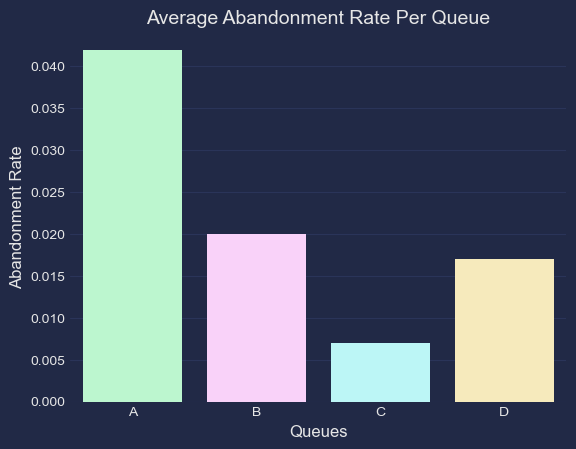

In [160]:
# Create visualization 1 here
# Import any additional libraries needed with alias
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style


# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = (queue_dict["Abandoned"][i] / queue_dict["Calls"][i]).round(3) 

abandonment_rates_df = pd.DataFrame(abandonment_rates, index=['Abandonment Rate']).T
print(abandonment_rates_df)
#Your Code Here:
import mplcyberpunk
style.use('cyberpunk')
colors = ['#b3ffcc', '#ffccff', '#b3ffff', '#fff0b3']

    
sb.barplot(data=abandonment_rates_df, x=abandonment_rates_df.index, y='Abandonment Rate', palette=colors)
plt.xticks(rotation=0)
plt.xlabel('Queues',fontsize=12)
plt.ylabel('Abandonment Rate', fontsize=12)
plt.title('Average Abandonment Rate Per Queue', fontsize=14)
plt.show()

#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?
##### Record your answer by double clicking here:

> Chart style you chose and why: I chose a bar graph for both of these. Similarly, We wanted to show and compare the average speed of an answer for each rep as well as the service level percentage for each rep. I put these in two bar charts side by side.

        Calls_x  Calls_y  Service Level %
Rep ID                                   
Amanda        3        5        60.000000
Andy          3       10        30.000000
Brent         6        8        75.000000
Cam           5       11        45.454545
Duke          6       14        42.857143
Joe           2       10        20.000000
Lilly         4       12        33.333333
Todd          2        6        33.333333
Xander        2        6        33.333333


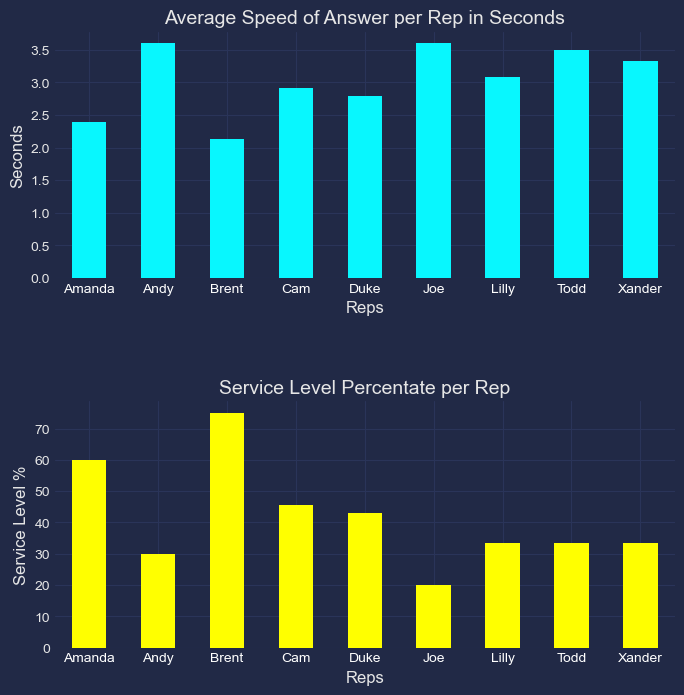

In [161]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north[north["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table
quick_stats

# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north[north["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  
total_stats

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")
service_level

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100
print(service_level)

service_per_col = service_level["Service Level %"]

#Your Code Here:
fig, axs = plt.subplots(2, 1, figsize=(8,8))

north_plt.plot.bar(ax=axs[0], legend=False)
axs[0].set_title("Average Speed of Answer per Rep in Seconds", fontsize=14)
axs[0].set_xticklabels(north_plt.index, color = "white", rotation=0)
axs[0].set_xlabel("Reps", fontsize=12)
axs[0].set_ylabel("Seconds", fontsize=12)

plt.subplots_adjust(hspace=0.5)

service_per_col.plot.bar(ax=axs[1], color="yellow")
axs[1].set_xticklabels(service_per_col.index, color = "white", rotation=0)
axs[1].set_title("Service Level Percentate per Rep", fontsize=14)
axs[1].set_xlabel("Reps", fontsize=12)
axs[1].set_ylabel("Service Level %", fontsize=12)


plt.show()

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?
##### Record your answer by double clicking here:

> Chart style you chose and why: I would prefer the Grouped Bar Chart, but I also did the Stack Bar Chart. Again, I feel like this gives a good visual of the different amount of each call type (Incoming vs Outgoing) with in each Call Purpose, all side by side.

                 Incoming  Outgoing
Complaints             51       NaN
Sales Support          75     123.0
Product Support        82     228.0


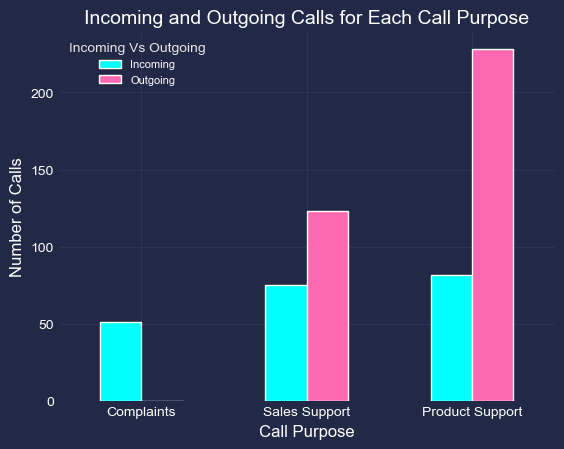

In [162]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

data ={  
'Complaints':  purpose_counts["Complaint"].to_dict(),
'Sales Support': purpose_counts["Sales Support"].to_dict(),
'Product Support': purpose_counts["Product Support"].to_dict()
}

new_df_purpose_counts = pd.DataFrame.from_dict(data, orient='index')
print(new_df_purpose_counts)
#Your Code Here:

colors = ['aqua', 'hotpink']

new_df_purpose_counts.plot.bar(edgecolor='white', color=colors)
plt.title('Incoming and Outgoing Calls for Each Call Purpose', fontsize=14, color='white')
plt.xticks(color = 'white', rotation=0)
plt.yticks(color = 'white')
plt.xlabel('Call Purpose', fontsize=12, color = 'white')
plt.ylabel('Number of Calls', fontsize=12, color = 'white')
plt.legend(title = 'Incoming Vs Outgoing', fontsize = 8, labelcolor='white')
plt.show()


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer by double clicking here:
> Your Answer: 

>In my opinion, the **South Branch** is **more efficient** than the North Branch. My interpretation is based on the KPIs, average abandonment rate, service level and average speed of answer. While the average answer speeds of the two branches are comparable, with only 0.05 second difference, and 40% of incoming calls at the North Branch are answered within 2 seconds compared to the 38% at the South Branch, the North Branch abandonment rate (2.86%) was more double of that of the South Branch abandonment rate (1.27%).


#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer by double clicking here:
> Your Answer: 

> While both branches would benefit from extra help, the **North Branch** would benefit the most with additional help. There are 9 Reps at the North Branch and there are 11 Reps at the South Branch. The North Branch is working comparative to the South Branch, though their abandonment rate is twice  (2.86%) as high as the South Branch’s abandonment rate and they take on 43.8% of the company’s overall calls. This branch would benefit from with additional help to see if there would be improvements in the abandonment rate. 

#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer by double clicking here:
> Your Answer: 
> There are a few things it would have been interesting to explore, especially in relation efficiency. 
> - It would have be interesting to explore if there would be any relation between the Busy Minutes, Not Ready Minutes with the abandonment rate of each branch.
> - As well as, to look to see the how long customers on have to wait for representatives with the During Call Wait Time. 


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer by double clicking here:

> Chart style you chose and why: 
- I first created a bar chart to show how many calls there were for each call purpose in each time block. 
- Then I also, created another bar chart to show the total calls for each time block, and then subplotted it with the chart above(calls per call purpose in each time block). I did this as a visual comparsion of the to charts.
- Again, as used throughout the assignment, I chose bar charts because it gives a good comparison between the variables.

- (Lastly, there are the charts using the get_group function, that was given to pull each call purpose)

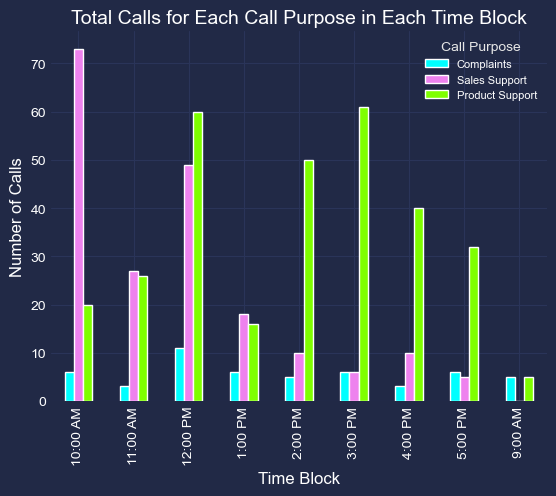

In [163]:
# Create your Bonus Mission visualization here!
# call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]
# call_times

call_times = df[["Time Block", "Call Purpose", "Calls"]]
call_times

## I chose to remove incoming or outgoing, because we are looking at the total
## number of calls in each time block for each call purpose

# Use groupby to plot based on time blocks:
total_call_types = call_times.groupby('Time Block').sum()

# Here I chose not to use the get_group to retieve the call purpose
# for visualization, and I like how it looks much better, with the
# get_group, I was have a difficult time with seperating the x-axis to just
# be time blocks (SEE BELOW THIS CODE - I left the get_group attempt in notebook

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
time_counts = purpose_group["Time Block"].value_counts()
#print(time_counts)

complaints = time_counts["Complaint"].to_dict()
sales_support = time_counts["Sales Support"].to_dict()
product_support = time_counts["Product Support"].to_dict()

data ={  
"Complaints":  time_counts["Complaint"].to_dict(),
"Sales Support": time_counts["Sales Support"].to_dict(),
"Product Support": time_counts["Product Support"].to_dict()
}

new_time_counts = pd.DataFrame.from_dict(data).sort_index(ascending=True)

colors = ["cyan", "violet", "chartreuse"]

new_time_counts.plot.bar(edgecolor="white", color=colors)
plt.title("Total Calls for Each Call Purpose in Each Time Block", fontsize=14, color="white")
plt.xticks(color = "white", rotation=90)
plt.yticks(color = "white")
plt.xlabel("Time Block", fontsize=12, color = "white")
plt.ylabel("Number of Calls", fontsize=12, color = "white")
plt.legend(title = "Call Purpose", fontsize = 8, labelcolor="white")
plt.show()


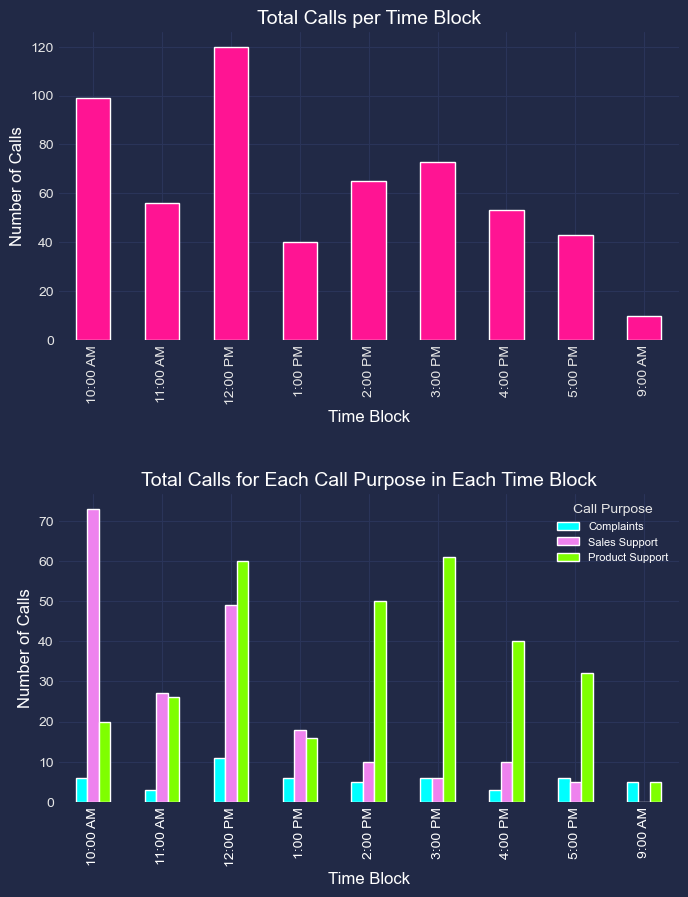

In [164]:
# Here I subplotted the two bar graphs into one figure too 
# to see the total calls per time block and how each is divided 
# between the call purposes

fig, axs = plt.subplots(2, 1, figsize=(8, 10))

total_call_types = call_times.groupby("Time Block").sum()
total_call_types.plot.bar(ax=axs[0], edgecolor="white", color="deeppink", legend=False)
axs[0].set_xlabel("Time Block", fontsize=12, color = "white")
axs[0].set_ylabel("Number of Calls", fontsize=12, color = "white")
axs[0].set_title("Total Calls per Time Block",  fontsize=14, color="white")

plt.subplots_adjust(hspace=0.5)

colors = ["cyan", "violet", "chartreuse"]

new_time_counts.plot.bar(ax=axs[1], edgecolor="white", color=colors)
axs[1].set_title("Total Calls for Each Call Purpose in Each Time Block", fontsize=14, color="white")
axs[1].set_xticklabels(new_time_counts.index, color = "white", rotation=90)
axs[1].set_xlabel("Time Block", fontsize=12, color = "white")
axs[1].set_ylabel("Number of Calls", fontsize=12, color = "white")
axs[1].legend(title = "Call Purpose", fontsize = 8, labelcolor="white")


plt.show()

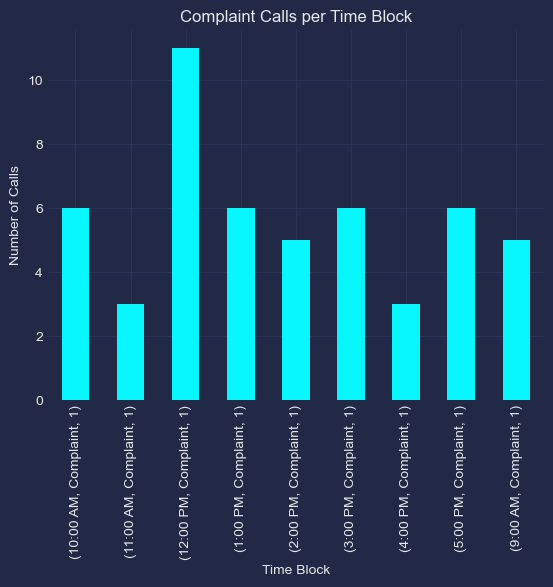

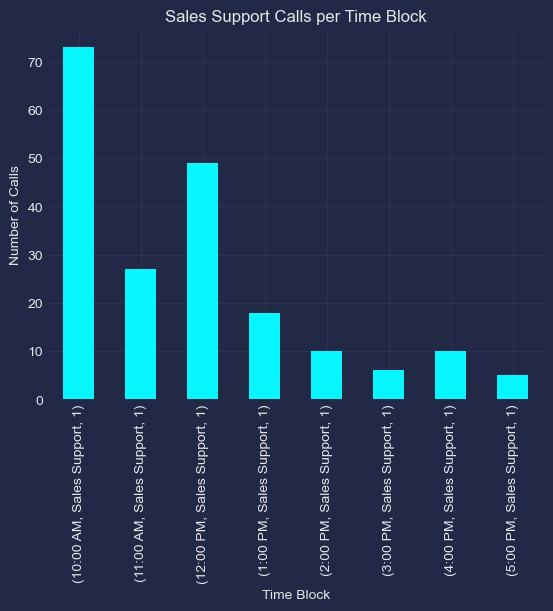

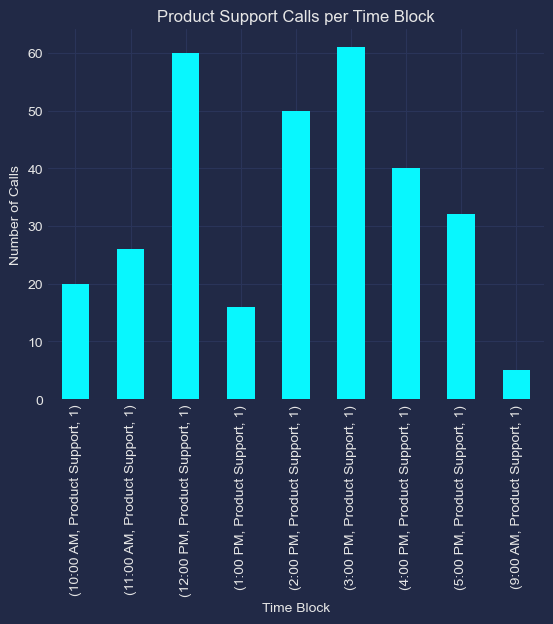

In [165]:
# Use groupby and get_group to select which call purpose to plot:
# Here are the plots if using the get_group function that was given

complaint_times = call_times.groupby('Call Purpose').get_group('Complaint').value_counts().sort_index()
complaint_times.plot.bar()
plt.xlabel('Time Block')
plt.ylabel('Number of Calls')
plt.title('Complaint Calls per Time Block')
plt.show()


sales_times = call_times.groupby('Call Purpose').get_group('Sales Support').value_counts().sort_index()
sales_times.plot.bar()
plt.xlabel('Time Block')
plt.ylabel('Number of Calls')
plt.title('Sales Support Calls per Time Block')
plt.show()


product_times = call_times.groupby('Call Purpose').get_group('Product Support').value_counts().sort_index()
product_times.plot.bar()
plt.xlabel('Time Block')
plt.ylabel('Number of Calls')
plt.title('Product Support Calls per Time Block')
plt.show()